## Basic Library

In [1]:
from config import CONFIG

from pattools.pat import PatWindow

patFile = CONFIG.DataRaw / 'pat' / 'test.chr21_22.pat.gz'
patWindow = PatWindow(patFile)
i = 0
for win in patWindow:
    i += 1
    if i == 5:
        break
    print(win)

('chr21', 26756576, {'CCCC': 1})
('chr21', 26756577, {'CCCC': 2, 'TCCC': 1})
('chr21', 26756578, {'CCCC': 2})
('chr21', 26756579, {'CCCT': 2, 'CCCC': 5, 'CCTT': 2, 'TCCC': 1})


## pattools

```
pattools deconv -m sun -g hg38 \
    -c /mnt/d/project/wgbs_tools/references/hg38/CpG.bed.gz \
    -p /mnt/d/data/cacLung/raw/pat/GSM5652289_Blood-T-Eff-CD8-Z0000041F.hg38.pat.gz \
    -o /mnt/d/project/pattools/tmp/out.csv
```

# Methylation Vector


## Basic Theory

In the PAT format file, methylated CpG sites are denoted by 'C', and unmethylated CpG sites are denoted by 'T'. In the vector representation of methylation, a '1' corresponds to a methylated site, while a '0' corresponds to an unmethylated site. Consequently, the sequence 'CCTTCT' in the PAT format can be represented by the vector [1, 1, 0, 0, 1, 0]. Continuous CpG sites of length $n$ are used as a window, which contains several CpG motifs of the same length. These motifs can be converted into vector format. For instance, in a window of length 3, the following motif is included:

$$
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 0 \\
0 & 0 & 0 \\
\end{pmatrix}
$$

The vectors corresponding to motifs within a window of length $n$ are situated within an $n$-dimensional Cartesian coordinate system.


## Code

chr21	26794712	1	-1.000	0.888	8853	5315|653|318|823|836|61|101|101|92|53|212|43|8|33|107|97
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


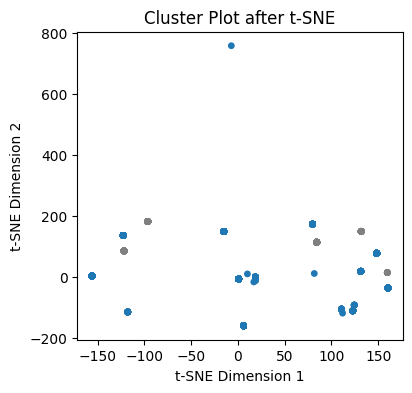

In [2]:
from pattools.motif import Motif
from pattools.vector.calculator import VectorCalculator, VectorPlot

# chr1    13088   1       -1.000  0.542   30      5|6|0|0|1|1|3|2|1|0|0|2|3|2|0|4
# chr21   26794712        2       0.894   0.921   460     243|24|7|8|8|16|0|4|0|4|3|2|14|3|7|117
# chr1    1374704 1       -1.000  0.888   8853    5315|653|318|823|836|61|101|101|92|53|212|43|8|33|107|97
s = '5315|653|318|823|836|61|101|101|92|53|212|43|8|33|107|97'

motif = Motif(4)
motif_count = dict(zip(motif.motifs, [int(x) for x in s.split('|')]))

vector_calculator = VectorCalculator()
vector_calculator.set_motif_count('chr21', 26794712, motif_count)
vector_calculator.calc()
print(vector_calculator)
VectorPlot(vector_calculator).plot_vector_cluster()

In [15]:
import matplotlib.pyplot as plt

# 获取默认的颜色循环
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
